## First import necessary modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

## Get the data for the assignment

In [3]:
# get data from link, skip first 23 rows
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",skiprows=23)
df.head()

/tmp/ipykernel_1790/2563635654.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [4]:
# set the date as index to make timeseries easier
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [5]:
# make sure index is datetime
df.index = pd.to_datetime(df.index, dayfirst=True)

/tmp/ipykernel_1790/112963961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True)


## Plot the temperature

In [6]:
# Filter for a specific day. I looked at csv and chose latest day with multiple rows
day = '2025-09-30'

In [7]:
# Filter rows for whatever day specified by making sure index = the date specified in our subset of the data
df_day = df[df.index.date == pd.to_datetime(day).date()]

In [8]:
# check it looks alright
df_day.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
2025-09-30 00:00:00,0,0.2,0,12.0,0,11.7,11.4,13.5,96,1019.1,2,13,2,180,,,0.0,1800,9,8
2025-09-30 01:00:00,0,0.6,0,11.8,0,11.7,11.6,13.7,99,1018.9,2,13,2,180,,,0.0,2900,1,8
2025-09-30 02:00:00,0,0.1,0,11.8,0,11.8,11.7,13.8,100,1018.7,2,12,2,180,,,0.0,2600,2,8
2025-09-30 03:00:00,0,0.0,0,11.9,0,11.9,11.8,13.9,100,1018.5,2,11,2,180,,,0.0,2600,1,8
2025-09-30 04:00:00,3,0.0,0,12.0,0,12.0,12.0,14.0,100,1018.3,2,11,2,170,,,0.0,200,1,8


In [9]:
# make a time column out of the index (which is my datetime)
# First draft wasn't styled clearly for the user so using str formats: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior 
df_day['Hour'] = df_day.index.strftime('%H:00')

/tmp/ipykernel_1790/184857245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Hour'] = df_day.index.strftime('%H:00')


In [11]:
df_day.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,Hour
date,,,,,,,,,,,,,,,,,,,,,
2025-09-30 00:00:00,0,0.2,0,12.0,0,11.7,11.4,13.5,96,1019.1,...,13,2,180,,,0.0,1800,9,8,00:00
2025-09-30 01:00:00,0,0.6,0,11.8,0,11.7,11.6,13.7,99,1018.9,...,13,2,180,,,0.0,2900,1,8,01:00
2025-09-30 02:00:00,0,0.1,0,11.8,0,11.8,11.7,13.8,100,1018.7,...,12,2,180,,,0.0,2600,2,8,02:00
2025-09-30 03:00:00,0,0.0,0,11.9,0,11.9,11.8,13.9,100,1018.5,...,11,2,180,,,0.0,2600,1,8,03:00
2025-09-30 04:00:00,3,0.0,0,12.0,0,12.0,12.0,14.0,100,1018.3,...,11,2,170,,,0.0,200,1,8,04:00


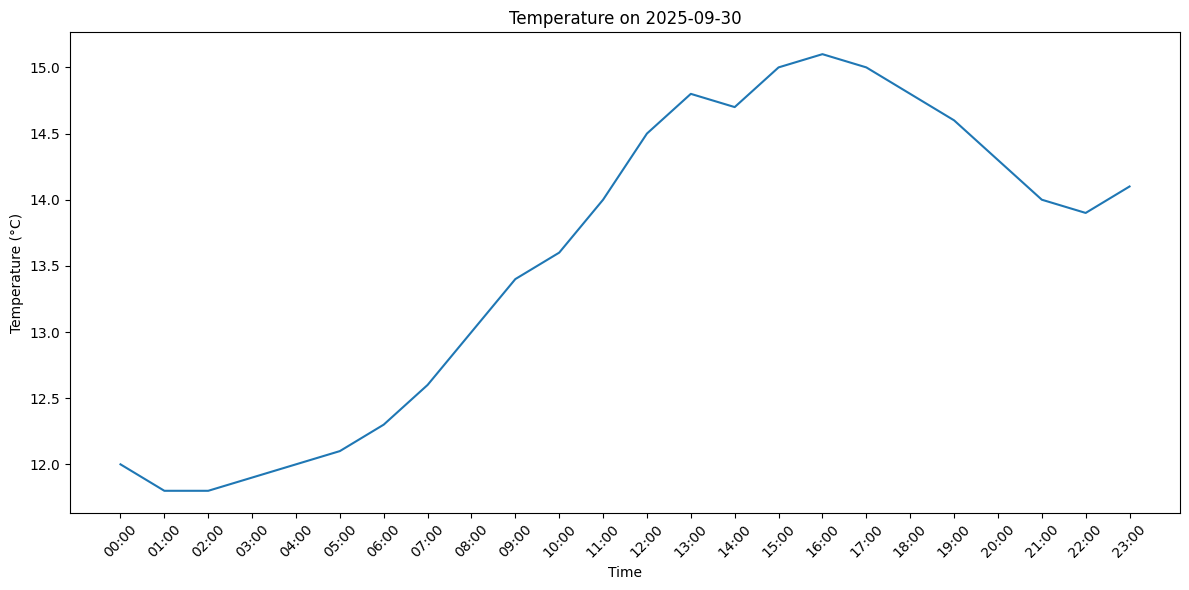

In [12]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
# put the date (which includes time) in x axis and temp in time.
sns.lineplot(data=df_day, x='Hour', y='temp')
# format the title to say what day you've selected
plt.title(f"Temperature on {day}")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Plot the mean temperature each day

In [15]:
# next i'll plot average daily temp for September
month = '2025-09'

In [16]:
# like before, get a subset of my data. convert it to strg and specify the format, then specifc which value to keep. 
df_month = df[df.index.strftime('%Y-%m') == '2025-09']

In [17]:
df_month.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
2025-09-01 00:00:00,0,0.1,0,11.8,0,11.6,11.5,13.5,98,989.7,2,8,4,200,,,0.0,14000,18,8
2025-09-01 01:00:00,0,4.6,0,12.0,0,12.0,11.9,14.0,100,990.1,2,7,4,230,,,0.0,20000,3,7
2025-09-01 02:00:00,0,0.0,0,12.0,0,12.0,12.0,14.0,100,990.5,2,7,4,240,,,0.0,16000,2,8
2025-09-01 03:00:00,0,0.0,0,11.5,0,11.4,11.3,13.4,99,990.8,2,6,4,230,,,0.0,30000,170,8
2025-09-01 04:00:00,0,0.0,0,12.2,0,12.2,12.1,14.2,100,991.0,2,8,4,240,,,0.0,23000,7,7


In [ ]:
# use the resample method this time: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html 
daily_avg_temp = df_month['temp'].resample('D').mean()

In [19]:
# show that date is still the index but just showing days now, and the mean is there as values.
daily_avg_temp.head()

date
2025-09-01    12.504167
2025-09-02    11.941667
2025-09-03    12.350000
2025-09-04    12.466667
2025-09-05    12.695833
Freq: D, Name: temp, dtype: float64

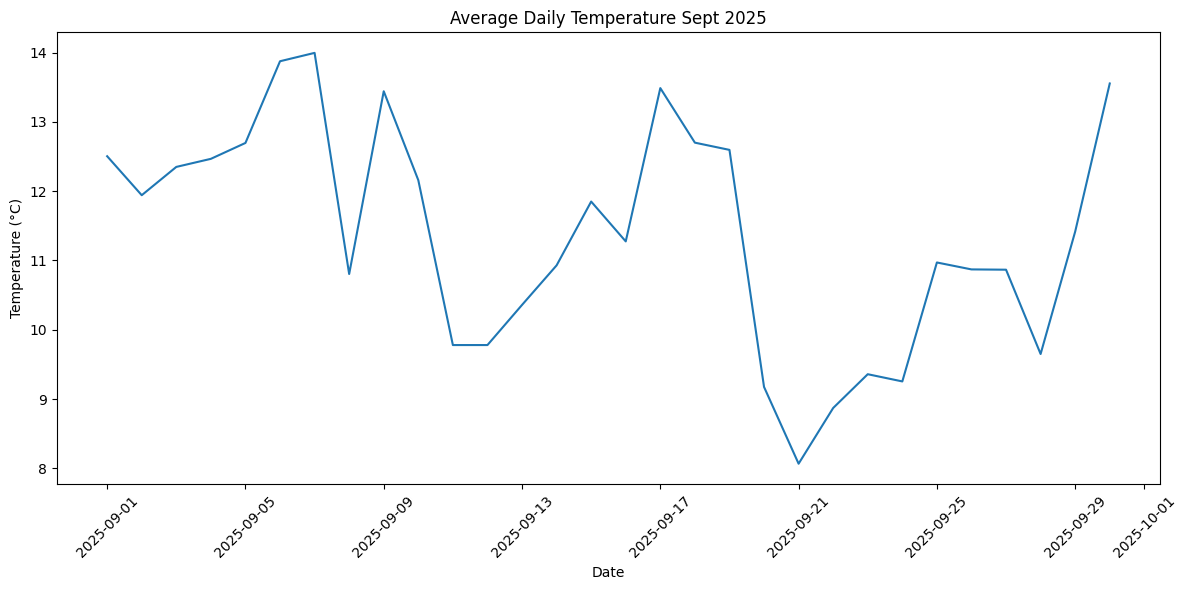

In [20]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
# put the date in x axis and temp in y.
sns.lineplot(x=daily_avg_temp.index, y=daily_avg_temp.values)
# format the title to say what day you've selected
plt.title("Average Daily Temperature Sept 2025")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plot the mean temperature for each month

In [21]:
# let's just look at 2025 for monthly average
df_year = df[df.index.strftime('%Y') == '2025']

In [22]:
monthly_avg_temp = df_year['temp'].resample('M').mean()

/tmp/ipykernel_1790/3757903492.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df_year['temp'].resample('M').mean()


In [23]:
monthly_avg_temp.head()

date
2025-01-31     3.781586
2025-02-28     5.058333
2025-03-31     7.214247
2025-04-30     9.803889
2025-05-31    12.409274
Freq: ME, Name: temp, dtype: float64

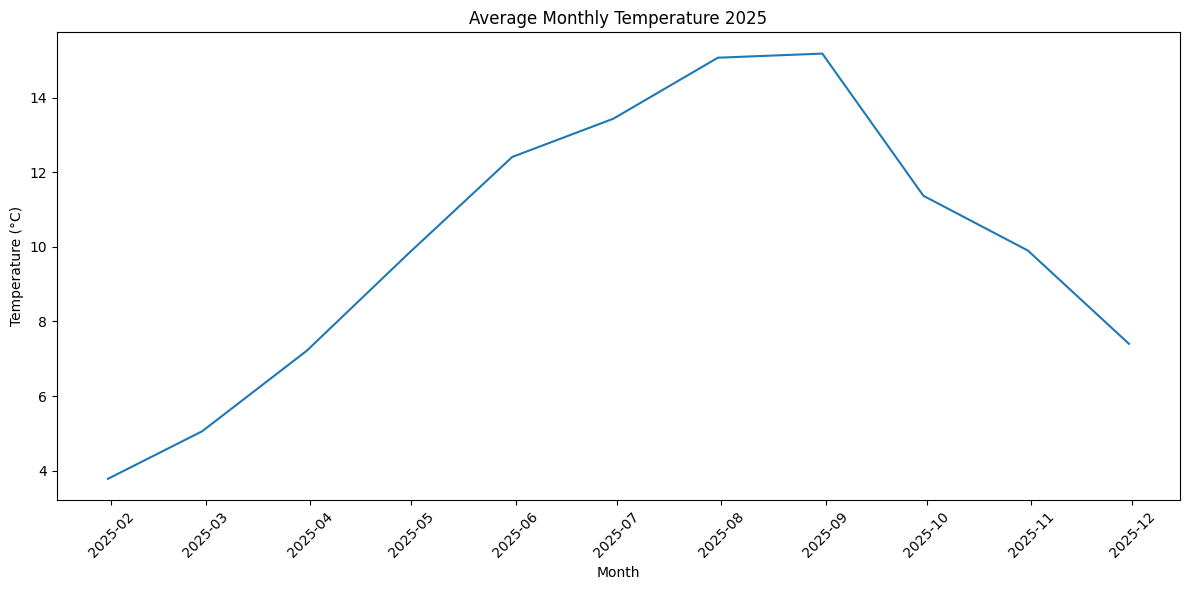

In [24]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
# put the date in x axis and temp in y.
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
# format the title to say what day you've selected
plt.title("Average Monthly Temperature 2025")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The Windspeed

In [26]:
# check the values present in the windspeed column. see: https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html 
df_day['wdsp'].unique()

array([13, 12, 11, 14, 15, 17], dtype=object)

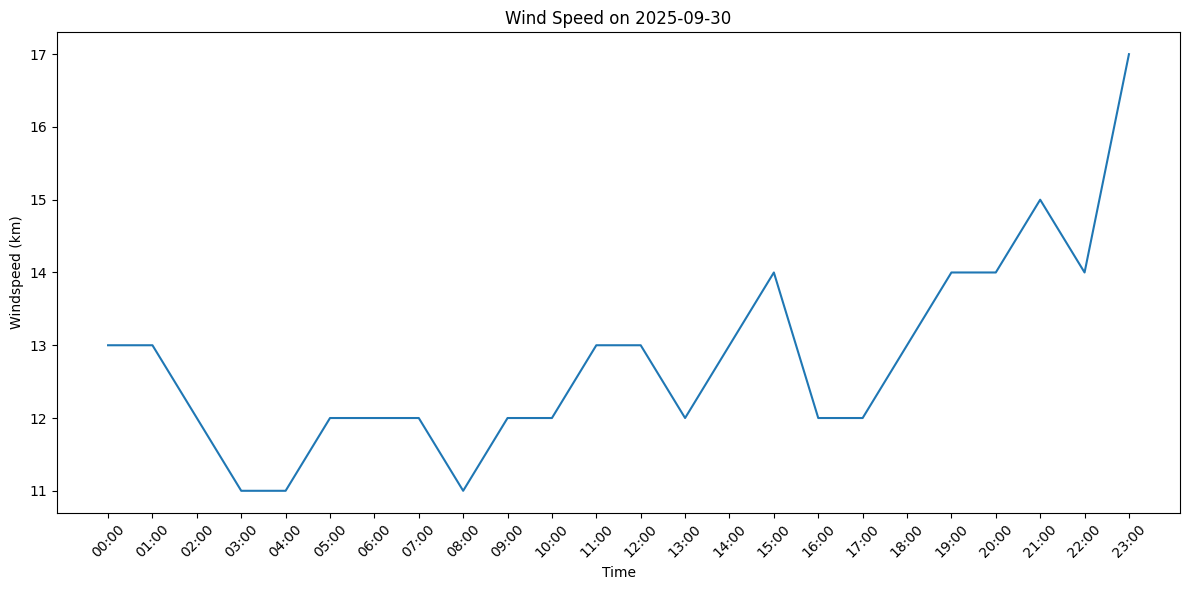

In [ ]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
# put the date (which includes time) in x axis and temp in time.
sns.lineplot(data=df_day, x='Hour', y='wdsp')
# format the title to say what day you've selected
plt.title(f"Wind Speed on {day}")
plt.xlabel("Time")
plt.ylabel("Windspeed (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The rolling windspeed over 24 hours

In [36]:
# add a rolling avg column for windspeed. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html 
df_day['rolling_avg'] = df_day['wdsp'].rolling(window='24H').mean()

/tmp/ipykernel_1790/2717515391.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_day['rolling_avg'] = df_day['wdsp'].rolling(window='24H').mean()
/tmp/ipykernel_1790/2717515391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['rolling_avg'] = df_day['wdsp'].rolling(window='24H').mean()


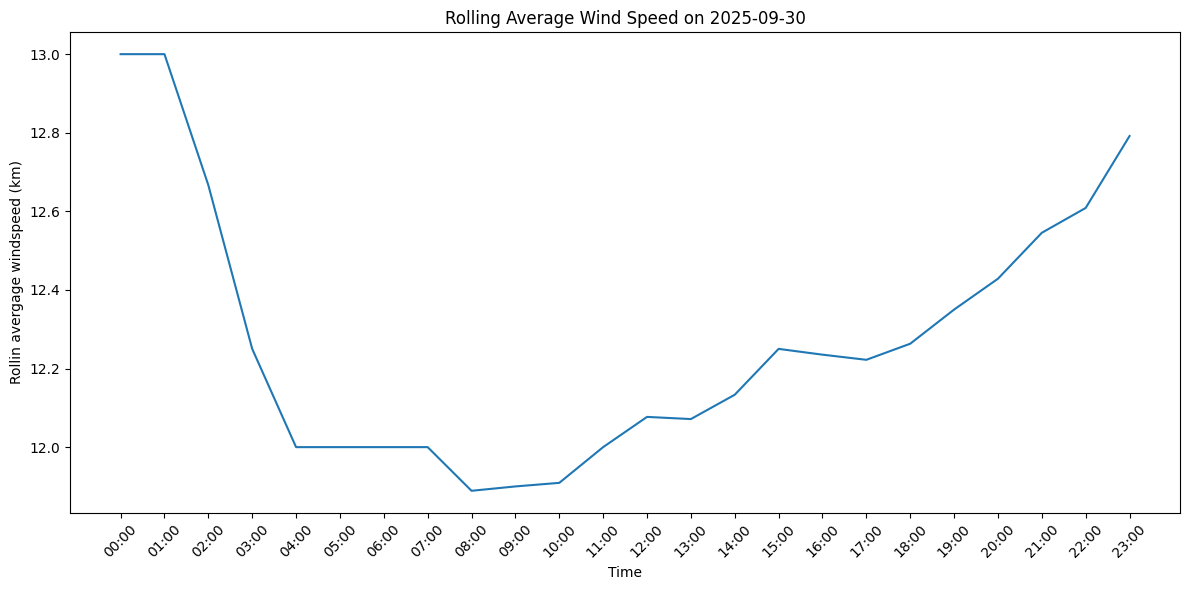

In [37]:
# Plot temperature over time
plt.figure(figsize=(12, 6))
# put the date (which includes time) in x axis and temp in time.
sns.lineplot(data=df_day, x='Hour', y='rolling_avg')
# format the title to say what day you've selected
plt.title(f"Rolling Average Wind Speed on {day}")
plt.xlabel("Time")
plt.ylabel("Rollin avergage windspeed (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The max windspeed for each day

In [38]:
# use the month df and resample to max
daily_max_wdsp = df_month['wdsp'].resample('D').max()

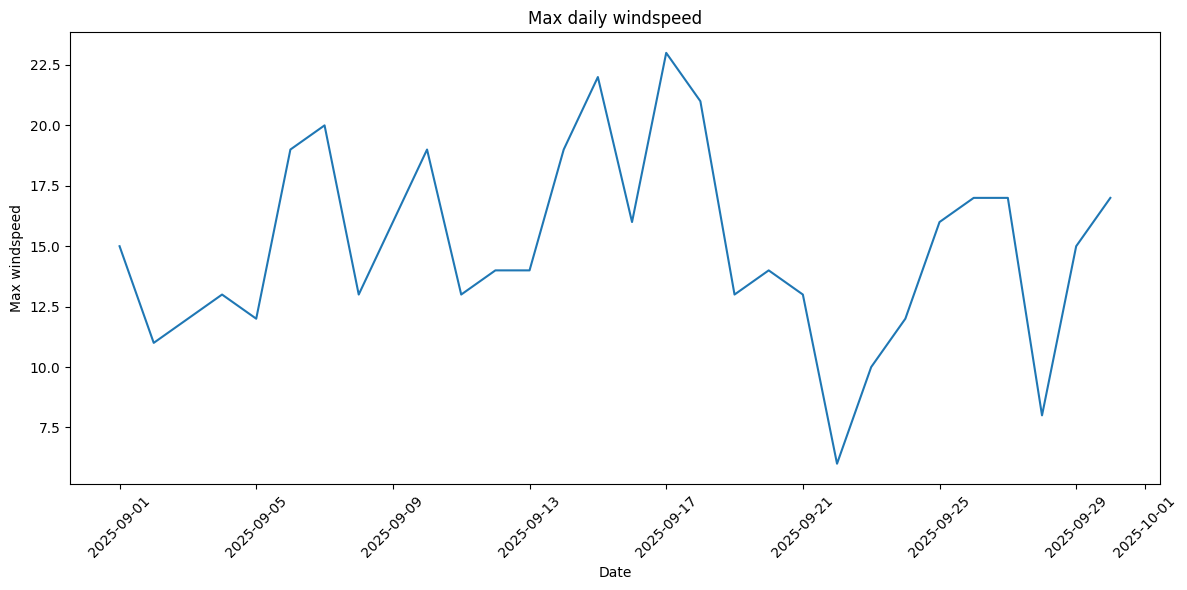

In [39]:
plt.figure(figsize=(12, 6))
# put the date in x axis and windspeed in y.
sns.lineplot(x=daily_max_wdsp.index, y=daily_max_wdsp.values)
# format the title to say what day you've selected
plt.title("Max daily windspeed")
plt.xlabel("Date")
plt.ylabel("Max windspeed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The monthly mean of the daily max windspeeds